<!--

## LAST (Family) NAME:   _____________________________________

## FIRST (Given) NAME:  ______________________________________


## STUDENT NUMBER: _______________________________________


## UNIVERSITY OF TORONTO
## Faculty of Arts & Science

## April 2022 EXAMINATIONS

## GGR274H1S
## Introductory Computation and Data Science for the Social Sciences

### Duration: 3 hours

### Aids Allowed: 10 8.5x11 inch sheets of notes, with text on both sides allowed

### Exam Reminders:



+	Fill out your name and student number on the top of this page. 
+	Do not begin writing the actual exam until the announcements have ended and the Exam Facilitator has started the exam.
+	As a student, you help create a fair and inclusive writing environment. If you possess an unauthorized aid during an exam, you may be charged with an academic offence.
+	Turn off and place all cell phones, smart watches, electronic devices, and unauthorized study materials in your bag under your desk. If it is left in your pocket, it may be an academic offence.
+	When you are done your exam, raise your hand for someone to come and collect your exam. Do not collect your bag and jacket before your exam is handed in.
+	If you are feeling ill and unable to finish your exam, please bring it to the attention of an Exam Facilitator so it can be recorded before leaving the exam hall.
+	In the event of a fire alarm, do not check your cell phone when escorted outside.

Special Instructions:




Exam Format and Grading Scheme:


Students must hand in all examination materials at the end
-->

# 2025 Final Exam Practice

Below is the final exam in 2022.

In 2022, the exam is paper-based, so the answers to questions are in words instead of Python codes.

In this year, like midterm, you will write Python codes to complete simliar tasks with step-by-step instructions for some questions and answer in words for other questions.

Therefore, in addition to answering the questions in this practice, you could also try to write the codes by yourself to get familiar with what you will encounter in this year's final exam.


## Final Exam Practice Session

If you have any questions regarding this final exam practice, you might want to participate the following sessions held by Asana and Adrienne.

#### Asana Farshchi's session:
 
 - TBD
 - 
 - 
 
#### Adrienne Lam's session

 - April 16th 1:00pm - 3:00pm
 - Join by [Zoom link](https://utoronto.zoom.us/j/82592320364)
 - Or Meeting ID: 825 9232 0364


# Instructions

In this exam, we will use information from the Toronto Health Profiles dataset and the Ontario Marginalization Index dataset. 

We have made good use of both of these dataset this term but as a quick recap:
- the Toronto Health Profiles dataset describes the rates of various diseases and health issues at the neighbourhood level across Toronto. 
- the Ontario Marginalization Index dataset provides a number thaat represents the level of social marginalization in each Toronto neighbourhood. Marginialization is defined as a combination of material deprivation, residential instability, dependency, and 'ethnic concentration'. 

While there are a number of diseases in the Toronto Health Profiles dataset, for this exam, we will focus on chronic obstructive pulmonary disease (COPD), which is a long-term lung condition that makes it hard for you to breathe. We will use the variable describing the percent of adults age 35+ who have COPD in each neighbourhood.

A data scientist wants to answer the following questions by conducting 4 different analyses:
1. Do neighbourhoods with higher levels of marginalization have higher precentages of adults with COPD?
2. Is there spatial clustering of COPD in Toronto and if so, where is it?
3. Can we use a linear regression to model how the percent of adults with COPD relates to marginalization and the number of COVID-19 testing sites in a neighbourhood?

## Question 1

Do neighbourhoods with higher levels of marginalization have higher precentages of adults with COPD?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

marg_neighb = pd.read_excel('1_marg_neighb_toronto_2006_OnMarg.xls', 
                            sheet_name='Neighbourhood_Toronto_OnMarg', header=1)

important_columns = ['Neighb id ', 'Neighbourhood name ', 
                     'POPULATION','ONMARG_COMBINED_Q']

column_names = {'Neighb id ': 'neighbID',
                'Neighbourhood name ': 'names',
                'POPULATION': 'population',
                'ONMARG_COMBINED_Q': 'onMarg'}

sub_marg_df = marg_neighb[important_columns]
renamed_marg_df = sub_marg_df.rename(columns = column_names)

print(renamed_marg_df.shape)

renamed_marg_df.head()

(140, 4)


,neighbID,names,population,onMarg
0,1,West Humber-Clairville,32252,2.4
1,2,Mount Olive-Silverstone-Jamestown,32127,2.4
2,3,Thistletown-Beaumond Heights,9928,2.8
3,4,Rexdale-Kipling,10725,2.8
4,5,Elms-Old Rexdale,9879,2.6


Answer the following questions related to the python code above.

**Q**

What is the full name of the text file that is read into the pandas DataFrame `marg_neighb`?

ANS: 

**Q**

What is the purpose of `header=1`?

ANS: 

**Q**

i)

What will be printed out when the following code is run? (1 mark)

ANS: 

In [2]:
important_columns = ['Neighb id ', 'Neighbourhood name ', 
                     'POPULATION', 'ONMARG_COMBINED_Q']

print(type(important_columns))

<class 'list'>


ii)

What will be printed out when the following code is run? (1 mark)

ANS: 

In [3]:
column_names = {'Neighb id ': 'neighbID',
                'Neighbourhood name ': 'names',
                'POPULATION': 'population',
                'ONMARG_COMBINED_Q': 'onMarg'}

print(type(column_names))

<class 'dict'>


**Q**

How many rows and columns are in the DataFrame `renamed_marg_df`? (2 marks)

ANS: 

**Q**

What is the name of the column specified by `renamed_marg_df.iloc[:, 2]`?  (1 mark)

ANS: 

### Merging the data

Now we will bring in the Toronto Health Profiles data and join it with the Ontario Marg. data:

In [4]:
copd_full_data = pd.read_excel('1_ahd_neighb_db_ast_hbp_mhv_copd_2007.xls', 
                            sheet_name='1_ahd_neighb_copd_2007', header=11)

sub_copd_data = copd_full_data[copd_full_data.columns[[0, 11]]]                    

column_names_copd = {'Unnamed: 0': 'neighbID',
            '% With COPD.2': 'percent_copd'}

renamed_copd_df = sub_copd_data.rename(columns = column_names_copd)

marg_copd_df = renamed_copd_df.merge(renamed_marg_df, on = ['neighbID'])
marg_copd_df.head()


,neighbID,percent_copd,names,population,onMarg
0,1,6.6,West Humber-Clairville,32252,2.4
1,2,7.1,Mount Olive-Silverstone-Jamestown,32127,2.4
2,3,7.4,Thistletown-Beaumond Heights,9928,2.8
3,4,8.4,Rexdale-Kipling,10725,2.8
4,5,9.0,Elms-Old Rexdale,9879,2.6


## Question 1.5

Here, we make a copy of the dataframe. The code in this question operates on a copy of the renamed marginalization dataset so that it doesn't interfere with questions that come later.

In [16]:
marg_copd_df_copy = marg_copd_df.copy()
marg_copd_df_copy.head()

,neighbID,percent_copd,names,population,onMarg
0,1,6.6,West Humber-Clairville,32252,2.4
1,2,7.1,Mount Olive-Silverstone-Jamestown,32127,2.4
2,3,7.4,Thistletown-Beaumond Heights,9928,2.8
3,4,8.4,Rexdale-Kipling,10725,2.8
4,5,9.0,Elms-Old Rexdale,9879,2.6


**Q**

What type is `marg_copd_df_copy['onMarg']`?

ANS:

**Q**

The values in `marg_copd_df_copy['percent_copd']` are percentages (0 to 100). For this question, we want a new column in `marg_copd_df_copy` called `'proportion_copd'` that had the same information but as a __proportion__ (0 to 1).

Which of the following code cells would create that column? Select all that apply.

ANS:

In [17]:
# A
copd_proportions = marg_copd_df_copy['percent_copd'] * .01
marg_copd_df_copy['proportion_copd'] = copd_proportions
marg_copd_df_copy.head()

,neighbID,percent_copd,names,population,onMarg,proportion_copd
0,1,6.6,West Humber-Clairville,32252,2.4,0.066
1,2,7.1,Mount Olive-Silverstone-Jamestown,32127,2.4,0.071
2,3,7.4,Thistletown-Beaumond Heights,9928,2.8,0.074
3,4,8.4,Rexdale-Kipling,10725,2.8,0.084
4,5,9.0,Elms-Old Rexdale,9879,2.6,0.090


In [10]:
# # B
# copd_proportions = marg_copd_df_copy['percent_copd'] ÷ 100
# marg_copd_df_copy['proportion_copd'] = copd_proportions
# marg_copd_df_copy.head()

In [11]:
# # C
# copd_proportions = marg_copd_df_copy['percent_copd'] / 100
# marg_copd_df_copy['proportion_copd'] = copd_proportions
# marg_copd_df_copy.head()

In [12]:
# # D
# marg_copd_df_copy['proportion_copd'] = marg_copd_df_copy['percent_copd'] / 100
# marg_copd_df_copy.head()

In [12]:
# E
#copd_proportions = marg_copd_df_copy['percent_copd'] / 100
#marg_copd_df_copy.iloc[:,'proportion_copd'] = copd_proportions
#marg_copd_df_copy.head()

**Q**

Consider this code. From the choices below, select the statements that are valid.

ANS: 

In [13]:
low_marg = marg_copd_df_copy['onMarg'] <= 2
low_marg_df = marg_copd_df_copy.loc[low_marg, :]

A. Variable `low_marg` refers to column `'onMarg'` from `marg_copd_df_copy`.

B.  Variable `low_marg` refers to a Boolean series that is `True` for `'onMarg'` values that are less than or equal to 2 in `marg_copd_df_copy` and `False` otherwise.

C. Variable `low_marg_df` refers to a dataframe containing only the rows from `marg_copd_df_copy` where the `'onMarg'` value is less than or equal to than 2.

D. Variable `low_marg_df` refers to the same thing as `marg_copd_df_copy` but with a new column called `'high_marg'`.

## Question 2

The data scientist conducts further analyses below.

In [14]:
marg_copd_df.describe()

,neighbID,percent_copd,population,onMarg
count,140.0000,140.000000,140.000000,140.000000
mean,70.5000,8.965714,17805.450000,2.400000
std,40.5586,1.941288,8427.630364,0.557487
min,1.0000,5.800000,6493.000000,1.000000
25%,35.7500,7.300000,11641.000000,2.000000
50%,70.5000,8.650000,15210.500000,2.400000
75%,105.2500,10.325000,21669.000000,2.800000
max,140.0000,14.200000,52461.000000,3.400000


Text(0.5, 0, 'perc. of adults with copd')

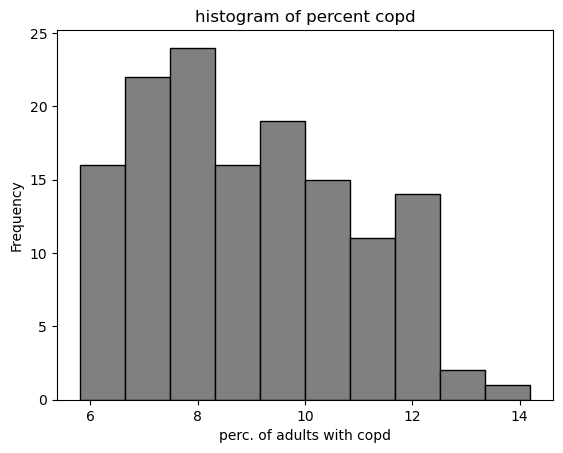

In [18]:
marg_copd_df["percent_copd"].plot.hist(color = 'grey', edgecolor = 'black', bins = 10)
plt.title('histogram of percent copd')
plt.xlabel('perc. of adults with copd')

Answer the following questions using the code and the output above.

**Q:** The data scientist begins by examining the empirical distribution of the data.

- Approximately how many neighbourhoods have a `percent_copd` value between 8.65 and 10.325?

ANS: 

**Q:**

- What does the mean of `percent_copd` being higher than the median imply about the distribution of the data?

ANS: 

Text(0, 0.5, 'Percent of Adults with COPD')

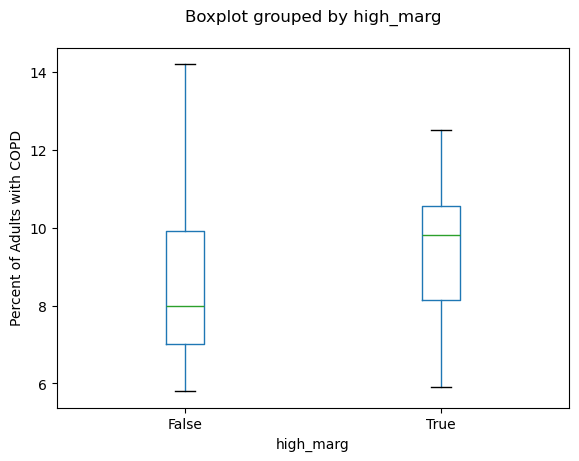

In [19]:
marg_copd_df['high_marg'] = marg_copd_df_copy['onMarg'] > 2.4

marg_copd_df.boxplot(column = 'percent_copd', 
                          by = 'high_marg',  
                          grid=False);
plt.title('')
plt.ylabel('Percent of Adults with COPD')

Answer the following questions by interpreting the code and resulting boxplot in the cell above:
    
**Q**
- Is this statement true or false? The neighbourhood with the highest percentage of adults with COPD has an `'onMarg'` value greater than 2.4.

ANS: 

- Compare the two medians. Rounding to the nearest integer (whole number), how much greater is the median "percent of adults with COPD" in neighbourhoods with higher levels of marginalization than the median in neighbourhoods with lower levels of marginalization?

ANS: 

## Question 3

Next, the data scientist would like to compare the percent of COPD in neighbourhoods with higher levels of marginalization (from column `'high_marg'`) with the percent of COPD in neighbourhoods with lower levels of marginalization. The data scientist conducts the following analyses.

In [20]:
def random_shuffle_mean():
    onMarg_HL_shuffle = marg_copd_df['high_marg'].sample(frac = 1, replace=False).reset_index(drop = True)

    perc_copd_low_shuffle = marg_copd_df.loc[onMarg_HL_shuffle == False, 'percent_copd'].mean()
    perc_copd_high_shuffle  = marg_copd_df.loc[onMarg_HL_shuffle == True, 'percent_copd'].mean()
    
    shuffled_diff = perc_copd_high_shuffle - perc_copd_low_shuffle 
    
    return shuffled_diff 

high_marg
False    8.563014
True     9.404478
Name: percent_copd, dtype: float64
0.8414639133101627


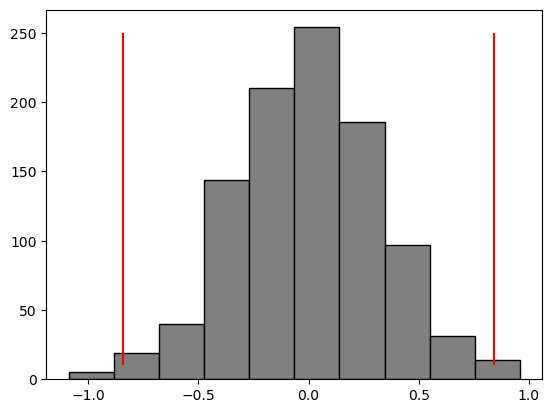

In [21]:
mean_table = marg_copd_df.groupby('high_marg')['percent_copd'].mean()
print(mean_table)

observed_mean_difference = mean_table.iloc[1] - mean_table.iloc[0]
print(observed_mean_difference)

random_shuffle_mean()
shuffled_diffs = []

for _ in range(1000):
    shuffled_diffs.append(random_shuffle_mean())
    
plt.hist(shuffled_diffs, color = 'grey', edgecolor = 'black')

plt.vlines(x = observed_mean_difference, ymin = 10, ymax = 250, color = 'red')

plt.vlines(x = -1*observed_mean_difference, ymin = 10, ymax = 250, color = 'red')

In [22]:
def pvalue(shuff_diffs, obs_diffs):
    rightextreme_count = (shuff_diffs >= obs_diffs).sum()
    leftextreme_count = (shuff_diffs < -1*obs_diffs).sum()
    allextreme = rightextreme_count + leftextreme_count
    pval = allextreme / len(shuff_diffs)
    return pval  

pvalue(shuff_diffs = shuffled_diffs, obs_diffs = observed_mean_difference)

0.009

Answer the following questions based on the code above.

**Q**  In function `random_shuffle_means`, when we sample the data, we and set the `replace` parameter equal to `False`. Is the following statement true or false?

+ We are allowing rows to be sampled more than once.

ANS: 

**Q:** How many shuffled differences of means are generated in the code above?

a. 250
b. 10
c. 5000
d. 1000

ANS:  

**Q** Consider this claim:
+ There is no difference in the percentage of adults with COPD between neighbourhoods with high `'onMarg'` values and those with low `'onMarg'` values.

Is that the __null__ hypothesis or the __alternative__ hypothesis?

ANS: 

**Q:** Given the p-value and a threshold of 0.05, do we reject or fail to reject the null hypothesis? (2 marks)

ANS: 

**Q** True or False: Using the method above, it is impossible to incorrectly reject a null hypthesis.

ANS: 

**Q** Given the analysis above, would you say that neighbourhoods with higher levels of marginalization have higher percentages of adults with COPD? Yes or no.

ANS: 

## Question 4

Next, the data scientist would like to explore the spatial distribution of the `'percent_copd'` column to understand if there is geographic clustering. They do the following analysis:

In [23]:
import geopandas as gpd
import mapclassify
import splot
import libpysal as lps
import esda
from splot.esda import moran_scatterplot

In [24]:
nbrhd = gpd.GeoDataFrame.from_file("Toronto_Neighbourhoods.geojson")

important_spat_cols = nbrhd.columns[[4, 5, 17]]
colnames_spat = {important_spat_cols[0]: 'name',
           important_spat_cols[1] : 'nbrhd_spat_id',
           important_spat_cols[2] : 'geometry'}

nbrhd_simple = nbrhd.copy()

nbrhd_simple = nbrhd_simple[important_spat_cols]
nbrhd_simple.rename(columns = colnames_spat, inplace=True)

nbrhd_simple["neighbID"] = nbrhd_simple["nbrhd_spat_id"].astype(int)

print('Before merge: ')
nbrhd_simple.head()

Before merge: 


,name,nbrhd_spat_id,geometry,neighbID
0,Casa Loma (96),096,"POLYGON ((-79.41469 43.67391, -79.41485 43.674...",96
1,Annex (95),095,"POLYGON ((-79.39414 43.66872, -79.39588 43.668...",95
2,Caledonia-Fairbank (109),109,"POLYGON ((-79.46021 43.68156, -79.46044 43.681...",109
3,Woodbine Corridor (64),064,"POLYGON ((-79.31485 43.66674, -79.3166 43.6663...",64
4,Lawrence Park South (103),103,"POLYGON ((-79.41096 43.70408, -79.41165 43.703...",103


In [25]:
nbrhd_simple = nbrhd_simple.merge(marg_copd_df, on="neighbID")

print('After merge: ')
nbrhd_simple.head()

After merge: 


,name,nbrhd_spat_id,geometry,neighbID,percent_copd,names,population,onMarg,high_marg
0,Casa Loma (96),096,"POLYGON ((-79.41469 43.67391, -79.41485 43.674...",96,7.7,Casa Loma,9815,2.0,False
1,Annex (95),095,"POLYGON ((-79.39414 43.66872, -79.39588 43.668...",95,8.6,Annex,27482,1.8,False
2,Caledonia-Fairbank (109),109,"POLYGON ((-79.46021 43.68156, -79.46044 43.681...",109,11.0,Caledonia-Fairbank,10281,2.4,False
3,Woodbine Corridor (64),064,"POLYGON ((-79.31485 43.66674, -79.3166 43.6663...",64,12.2,Woodbine Corridor,11550,2.0,False
4,Lawrence Park South (103),103,"POLYGON ((-79.41096 43.70408, -79.41165 43.703...",103,6.7,Lawrence Park South,14827,1.0,False


**Q** In the code, we created a new column `'neighbID'` that is based on column `'nbrhd_spat_id'`. Why did we do that?

ANS: 

<Axes: >

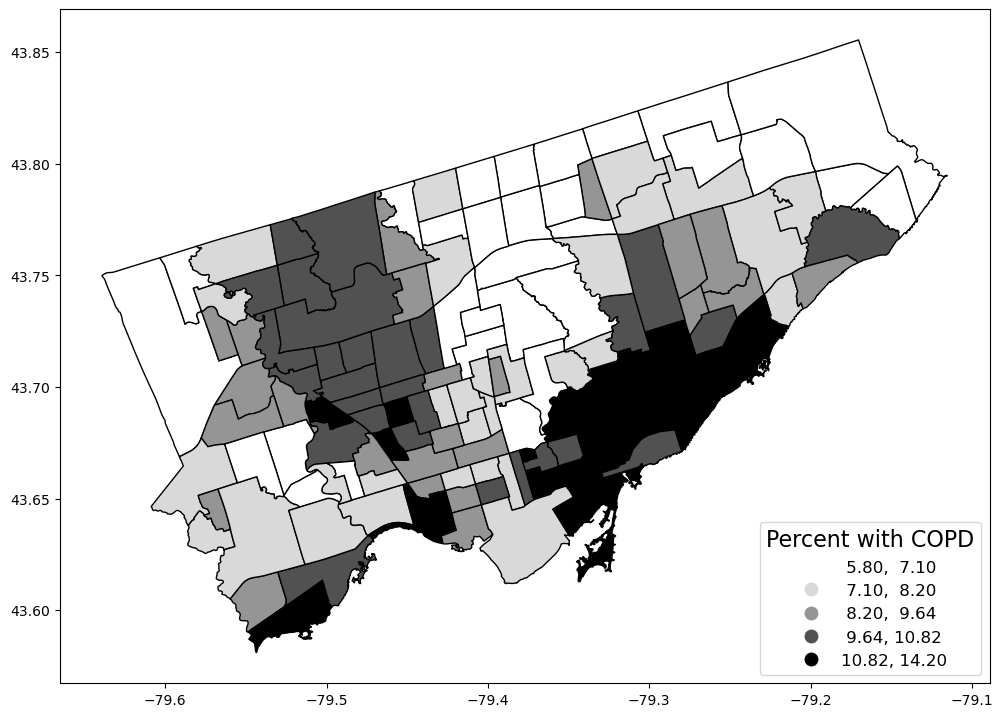

In [26]:
fig, axes = plt.subplots(1, 1, figsize = (12,12))

nbrhd_simple.plot(column='percent_copd', scheme='quantiles', 
                  k=5, cmap='Greys', edgecolor='black', 
                  ax = axes, legend=True, 
                  legend_kwds={'loc': 4, 'title': 'Percent with COPD', 
                               'title_fontsize': 16,'fontsize': 12})

Answer the following questions based on the code above the map and the output.

**Q** How many "figure" objects are produced?

ANS: 

**Q** How many "axis" objects are produced? 

ANS: 

**Q** Given the categorization scheme of `quantiles` and 5 groups, what are the percentile ranges for the five categories in the legend? (3 marks)

ANS: 

Next, the data scientist creates a weights matrix and conducts a cluster analysis.

In [28]:
w = lps.weights.Queen.from_dataframe(nbrhd_simple, use_index=False)
w.transform = 'R'

w[120]

{81: 0.16666666666666666,
 103: 0.16666666666666666,
 104: 0.16666666666666666,
 57: 0.16666666666666666,
 26: 0.16666666666666666,
 12: 0.16666666666666666}

**Q** The neighbourhood whose `'neighbID'` value is `120` is neighbours with how many other neighbourhoods?

ANS: 

In [29]:
# text-based histogram of the weights matrix
w.histogram

[(3, 9), (4, 13), (5, 31), (6, 40), (7, 25), (8, 13), (9, 8), (10, 0), (11, 1)]

**Q** Referring to the histogram in the output from the previous cell, how many neighbourhoods have exactly 10 neighbours? 

ANS: 

**Q** Referring to the histogram in the output from the previous cell, what is the most common number of neighbours our neighbourhoods have? 

ANS:

In [30]:
mi_randNumCol = esda.Moran(nbrhd_simple['percent_copd'], w)

print('The Morans I value is: ', mi_randNumCol.I)
print('The p-value of this Morans I value is: ', mi_randNumCol.p_sim)

The Morans I value is:  0.6341562248493351
The p-value of this Morans I value is:  0.001


(<Figure size 1500x400 with 3 Axes>,
 array([<Axes: title={'center': 'Moran Local Scatterplot'}, xlabel='Attribute', ylabel='Spatial Lag'>,
        <Axes: >, <Axes: >], dtype=object))

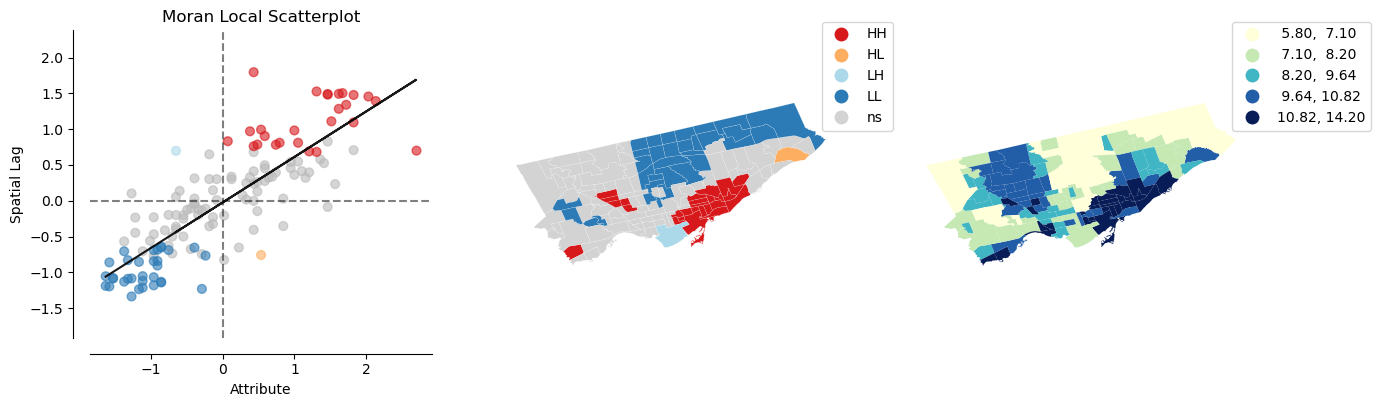

In [31]:
lisa = esda.Moran_Local(nbrhd_simple['percent_copd'], w)
splot.esda.plot_local_autocorrelation(lisa, nbrhd_simple, 'percent_copd')

**Q** What does the Moran's I value of 0.634 imply about the spatial clustering of column ``percent_copd``?

ANS: 

**Q** In the Moran Local Scatterplot, how would you describe the spatial context of neighbourhoods with points in the lower right quadrant (quadrant 4)?

Fill in the blanks: The neighbourhoods in this quadrant have `'percent_copd'` values (greater than/lower than) the mean while their neighbours have `'percent_copd'` values (greater than/lower than) the mean.

ANS: 

**Q** How would you describe the neighbourhood colored light blue on in the map in the centre in the previous cell, in the context of understanding how its `'percent_copd'` value relates to its neighbours?

ANS: 

## Question 5 

Finally, the data scientist decides they want to model how the percent of adults with COPD varies by neighbourhood, accounting for both the Ontario marginalization index AND the number of covid-19 testing sites within neighbourhoods.

To do this, they will first conduct a spatial join and then compute a regression model.

<Axes: >

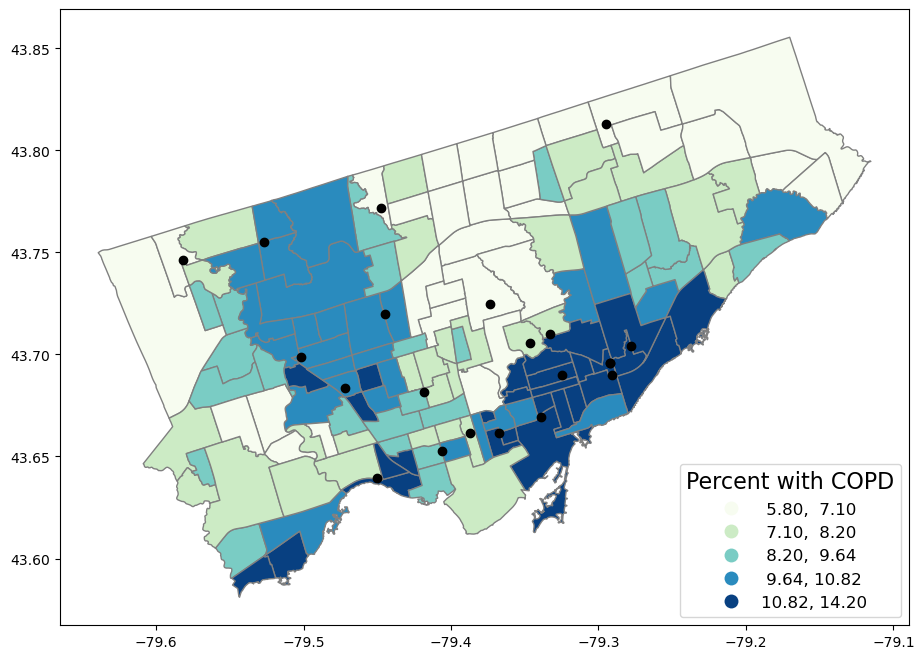

In [32]:
covid19sites = gpd.GeoDataFrame.from_file('covid-19-testing-sites.geojson')
fig, axes = plt.subplots(1,1, figsize = (12,8))
nbrhd_simple.plot(column='percent_copd', scheme='quantiles', 
                  k=5, cmap='GnBu', edgecolor='grey', 
                  ax = axes, legend=True, 
                  legend_kwds={'loc': 4, 'title': 'Percent with COPD', 
                               'title_fontsize': 16,'fontsize': 12})

covid19sites.plot(ax = axes, color = 'black')

**Q** Reading the code in the cell above the map, what do the red points represent? 

ANS: 

**Q** The data scientist wants to make a figure with two maps, with 2 rows and 1 column. Rewrite this line to make that happen:

+ `fig, axes = plt.subplots(1,1, figsize = (12,8)`

ANS: 

**Q** When we create the plot using `nbrhd_simple.plot`, to place a map or graph in the first of two axes, what would you put following the parameter `ax = `?

ANS:

In [33]:
join_left_df = nbrhd_simple.sjoin(covid19sites, how="left", predicate = "contains")
no_duplicates_gdf = join_left_df.copy()
no_duplicates_gdf = no_duplicates_gdf.drop_duplicates('neighbID')
testingsite_present = no_duplicates_gdf["index_right"] >= 0
testingsite_present.value_counts()
testingsite_not_present = no_duplicates_gdf["index_right"].isnull()
testingsite_not_present.value_counts()

columns_to_keep = ["name","neighbID","onMarg","percent_copd","index_right","geometry"]

#create our final analysis geodataframe and create a column 'rail_present' that is true 
#if railways are in the neighbourhood and false if not:
final_toronto_analysis = no_duplicates_gdf[columns_to_keep].copy()
final_toronto_analysis.loc[testingsite_present, 'testing_site_present'] = 1
final_toronto_analysis.loc[testingsite_not_present, 'testing_site_present'] = 0
final_toronto_analysis.head()

,name,neighbID,onMarg,percent_copd,index_right,geometry,testing_site_present
0,Casa Loma (96),96,2.0,7.7,NaN,"POLYGON ((-79.41469 43.67391, -79.41485 43.674...",0.0
1,Annex (95),95,1.8,8.6,NaN,"POLYGON ((-79.39414 43.66872, -79.39588 43.668...",0.0
2,Caledonia-Fairbank (109),109,2.4,11.0,NaN,"POLYGON ((-79.46021 43.68156, -79.46044 43.681...",0.0
3,Woodbine Corridor (64),64,2.0,12.2,NaN,"POLYGON ((-79.31485 43.66674, -79.3166 43.6663...",0.0
4,Lawrence Park South (103),103,1.0,6.7,NaN,"POLYGON ((-79.41096 43.70408, -79.41165 43.703...",0.0


In [34]:
from statsmodels.formula.api import ols

regmod = ols('percent_copd ~ onMarg + testing_site_present', data = final_toronto_analysis) # setup the model

In [35]:
regmod_fit = regmod.fit() 
print(regmod_fit.params)
print("rsquared: ",regmod_fit.rsquared)

Intercept               6.588549
onMarg                  0.979627
testing_site_present    0.192023
dtype: float64
rsquared:  0.08388954348277156


In [36]:
copd_summary = regmod_fit.summary()

copd_summary.tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,6.5885,0.705,9.350,0.000,5.195,7.982
onMarg,0.9796,0.290,3.379,0.001,0.406,1.553
testing_site_present,0.1920,0.470,0.408,0.684,-0.738,1.122


**Q** 
State which variables are the dependent and independent variables in the regression model `regmod`. (3 marks)

ANS: 

**Q**
Write out the regression equation given the intercept and coefficient values from the regression model `regmod`. (4 marks)

ANS: 

**Q** Does the regression model indicate a positive or negative relationship between percent COPD and onMarg? What about percent_copd and testing_site_present? What does the r-squared value tell us about the relationship between our two variables?  Briefly explain.  (5 marks)

ANS: 